# Sentiment Analysis

## Get data

In [1]:
import pandas as pd
from ast import literal_eval
df = pd.read_csv('plot_summary_df.csv', index_col=0, converters={'plot_tokens':literal_eval})

In [2]:
df

book  chapter_number            chapter_title  \
0       1               1        The Boy Who Lived   
1       1               2      The Vanishing Glass   
2       1               3  The Letters from No One   
3       1               4   The Keeper of the Keys   
4       1               5             Diagon Alley   
..    ...             ...                      ...   
193     7              32           The Elder Wand   
194     7              33        The Prince's Tale   
195     7              34         The Forest Again   
196     7              35             King's Cross   
197     7              36     The Flaw in the Plan   

                                                  plot  \
0    Vernon and Petunia Dursley of Number Four Priv...   
1    Dudley counting his presents Ten years pass si...   
2    Hundreds of letters arriving at the fireplace ...   
3    Rubeus Hagrid enters the cabin There is anothe...   
4    Ollivander Wand Shop When Harry wakes the next...   
..                                                 ...   
193  Voldemort and the Elder Wand Harry Hermione an...   
194  Snape memories Harry dives into Snape memories...   
195  Harry mother comforting him before his death H...   
196  Harry during his death However Harry finds him...   
197  Hagrid carrying Harry body Back in the forest ...   

                                           plot_tokens  
0    [Vernon, and, Petunia, Dursley, of, Number, Fo...  
1    [Dudley, counting, his, presents, Ten, years, ...  
2    [Hundreds, of, letters, arriving, at, the, fir...  
3    [Rubeus, Hagrid, enters, the, cabin, There, is...  
4    [Ollivander, Wand, Shop, When, Harry, wakes, t...  
..                                                 ...  
193  [Voldemort, and, the, Elder, Wand, Harry, Herm...  
194  [Snape, memories, Harry, dives, into, Snape, m...  
195  [Harry, mother, comforting, him, before, his, ...  
196  [Harry, during, his, death, However, Harry, fi...  
197  [Hagrid, carrying, Harry, body, Back, in, the,...  

[198 rows x 5 columns]

## Get hedonometer happiness scores

In [3]:
df_hedonometer = pd.read_csv('Hedonometer.csv', index_col=0) 
# adjust score to be from -5 to 5 instead of 0 to 10
adjusted_happiness = [score-5 for score in df_hedonometer['Happiness Score']]
df_hedonometer['Happiness Score'] = adjusted_happiness
df_hedonometer.head()

Word Word in English  Happiness Score  \
Rank                                               
0      laughter        laughter             3.50   
1     happiness       happiness             3.44   
2          love            love             3.42   
3         happy           happy             3.30   
4       laughed         laughed             3.26   

      Standard Deviation of Ratings  
Rank                                 
0                              0.93  
1                              0.97  
2                              1.11  
3                              0.99  
4                              1.16

### get happiness score function

function that takes a list of tokens and returns the happiness score of the text (list).
Words that do not exist in the labMT dataset can be ignored.

In [24]:
import numpy as np
# make happiness dict from df to use for lookup
happiness_score_dict = {row.Word: row['Happiness Score'] for index, row in df_hedonometer.iterrows()}
# function
def get_happiness_score(tokens):
    # get list of scores for all the words from the list that exist in the labmt dataset
    happiness_score = [happiness_score_dict[token] for token in tokens if token in happiness_score_dict.keys()]
    # return mean if there are any words with a score, else return nan
    return np.mean(happiness_score) if bool(happiness_score) else np.nan , np.std(happiness_score) if bool(happiness_score) else np.nan


In [25]:
# test function
print(get_happiness_score(['dfg','fgh','fjg','fj']))
print(get_happiness_score(['bad','good','ugly']))

(nan, nan)
(-0.8066666666666665, 2.126426318706785)


## Get happiness score for all chapters

In [26]:
import nltk
from nltk.corpus import stopwords

remove_stopwords = True # remove stopwords from token list
chapter_happiness = []
chapter_happiness_std = []
all_tokens_lower = []
for index, row in df.iterrows():
    chapter_tokens = [token.lower() for token in row['plot_tokens'] if (remove_stopwords and token not in stopwords.words('english'))]
    all_tokens_lower.append(chapter_tokens)
    # compute chapter happiness scores
    score, std = get_happiness_score(chapter_tokens)
    chapter_happiness.append(score)
    chapter_happiness_std.append(std)
# add to dataframe
df['happiness'] = chapter_happiness
df['happiness_std'] = chapter_happiness_std
df['tokens_cleaned'] = all_tokens_lower

In [27]:
df.head()

book  chapter_number            chapter_title  \
0     1               1        The Boy Who Lived   
1     1               2      The Vanishing Glass   
2     1               3  The Letters from No One   
3     1               4   The Keeper of the Keys   
4     1               5             Diagon Alley   

                                                plot  \
0  Vernon and Petunia Dursley of Number Four Priv...   
1  Dudley counting his presents Ten years pass si...   
2  Hundreds of letters arriving at the fireplace ...   
3  Rubeus Hagrid enters the cabin There is anothe...   
4  Ollivander Wand Shop When Harry wakes the next...   

                                         plot_tokens  happiness  \
0  [Vernon, and, Petunia, Dursley, of, Number, Fo...   0.548117   
1  [Dudley, counting, his, presents, Ten, years, ...   0.483477   
2  [Hundreds, of, letters, arriving, at, the, fir...   0.582125   
3  [Rubeus, Hagrid, enters, the, cabin, There, is...   0.412689   
4  [Ollivander, Wand, Shop, When, Harry, wakes, t...   0.538367   

                                      tokens_cleaned  chapter_in_series  \
0  [vernon, petunia, dursley, number, four, prive...                  1   
1  [dudley, counting, presents, ten, years, pass,...                  2   
2  [hundreds, letters, arriving, fireplace, ever,...                  3   
3  [rubeus, hagrid, enters, cabin, there, another...                  4   
4  [ollivander, wand, shop, when, harry, wakes, n...                  5   

   happiness_std  
0       1.001458  
1       1.026170  
2       0.852228  
3       1.112825  
4       0.875247

## plot happiness development

In [34]:
# general plot settings
import matplotlib as mpl
import matplotlib.pyplot as plt
def setup_mpl():
    mpl.rcParams['font.size']=7
    mpl.rcParams['figure.figsize']=(7,4)
    mpl.rcParams['figure.dpi']=200
    
setup_mpl()

tanker: 
- vi burde lave trend-lines så vi kan sige noget om tendensen.
- hvis vi kan, ville det være fedt at udpege hvad de forskellige min og max værdier hører til, ligesom de gør her https://hedonometer.org/timeseries/en_all/?from=2019-09-16&to=2021-03-15

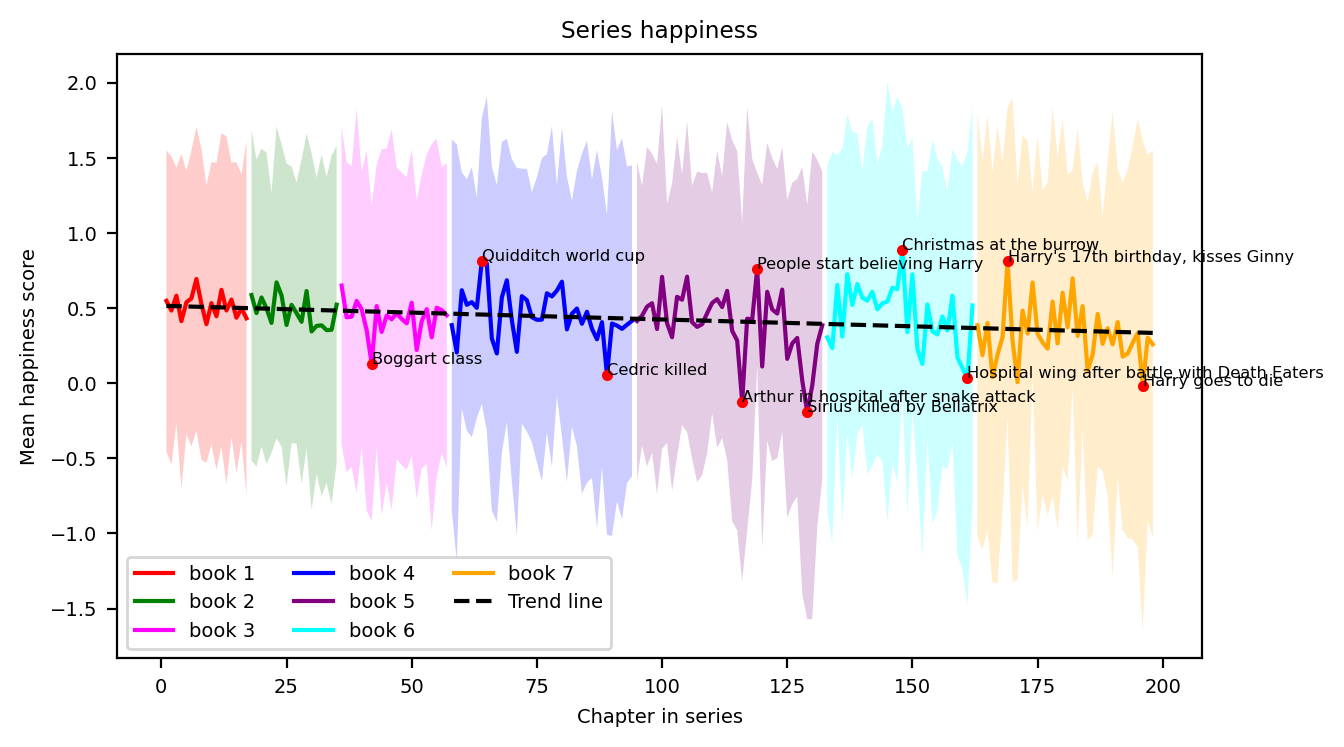

In [38]:
# the entire series in one long plot
# with or without std fill between
std = True

# ongoing chapter number
ch = [i for i in range(1,len(df)+1)]
df['chapter_in_series'] = ch

# make trendline
z = np.polyfit(df['chapter_in_series'], df['happiness'], 1)
p = np.poly1d(z)

#define colors for books
colors = ['red', 'green', 'magenta','blue','purple','cyan','orange']

# plot
fig, ax = plt.subplots()
for i in range(1,8):
    dfbook = df[df['book']==i]
    ax.plot(dfbook['chapter_in_series'], dfbook['happiness'], color=colors[i-1], label=f"book {i}")
    if std:
        ax.fill_between(dfbook['chapter_in_series'], dfbook['happiness']+dfbook['happiness_std'], dfbook['happiness']-dfbook['happiness_std'], facecolor=colors[i-1], alpha=0.2)
ax.plot(df['chapter_in_series'],p(df['chapter_in_series']),"k--", label="Trend line")
# interesting spots
ax.text(42,df['happiness'][41], "Boggart class", size='small')
ax.plot(42,df['happiness'][41],'r.')
ax.text(64,df['happiness'][63], "Quidditch world cup", size='small')
ax.plot(64,df['happiness'][63],'r.')
ax.text(89,df['happiness'][88], "Cedric killed", size='small')
ax.plot(89,df['happiness'][88],'r.')
ax.text(116,df['happiness'][115], "Arthur in hospital after snake attack", size='small')
ax.plot(116,df['happiness'][115],'r.')
ax.text(119,df['happiness'][118], "People start believing Harry", size='small')
ax.plot(119,df['happiness'][118],'r.')
ax.text(129,df['happiness'][128], "Sirius killed by Bellatrix", size='small')
ax.plot(129,df['happiness'][128],'r.')
ax.text(148,df['happiness'][147], "Christmas at the burrow", size='small') # fake positiv - læs plot
ax.plot(148,df['happiness'][147],'r.')
ax.text(169,df['happiness'][168], "Harry's 17th birthday, kisses Ginny", size='small') 
ax.plot(169,df['happiness'][168],'r.')
ax.text(196,df['happiness'][195], "Harry goes to die", size='small') 
ax.plot(196,df['happiness'][195],'r.')
ax.text(161,df['happiness'][160], "Hospital wing after battle with Death Eaters", size='small') 
ax.plot(161,df['happiness'][160],'r.')
ax.legend(loc="lower left", ncol=3)
ax.set_xlabel("Chapter in series")
ax.set_ylabel("Mean happiness score")
ax.set_title("Series happiness")
path = 'C:/Users/frede/OneDrive/Dokumenter/DTU/CSS_project_website/static/images/series_happiness'
if std:
    path += '_std'
path_end = '.png'
plt.savefig(path + path_end)
plt.show()


In [42]:
# sig noget om at vores plot summaries ikke har så mange ord sammenlignet med fx twitter data

print(f"shortest chapter has {min([len(ch) for ch in df['tokens_cleaned']])} tokens, longest chapter has {max([len(ch) for ch in df['tokens_cleaned']])} tokens")

shortest chapter has 30 tokens, longest chapter has 621 tokens


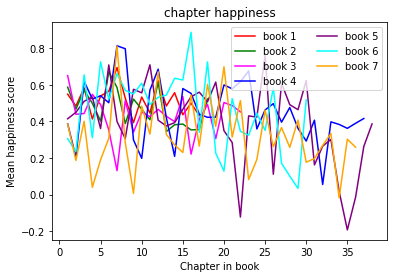

In [11]:
# hver bog hver for sig.
fig, ax = plt.subplots()
for i in range(1,8):
    dfbook = df[df['book']==i]
    ax.plot(dfbook['chapter_number'], dfbook['happiness'], color=colors[i-1], label=f"book {i}")
ax.legend(loc="upper right", ncol=2)
ax.set_xlabel("Chapter in book")
ax.set_ylabel("Mean happiness score")
ax.set_title("chapter happiness")
plt.show()

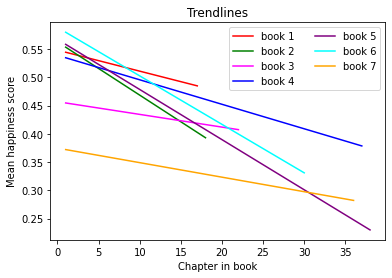

In [12]:
fig, ax = plt.subplots()
for i in range(1,8):
    dfbook = df[df['book']==i]
    # make trendline
    z = np.polyfit(dfbook['chapter_number'], dfbook['happiness'], 1)
    p = np.poly1d(z)
    ax.plot(dfbook['chapter_number'], p(dfbook['chapter_number']), color=colors[i-1], label=f"book {i}")
ax.legend(loc="upper right", ncol=2)
ax.set_xlabel("Chapter in book")
ax.set_ylabel("Mean happiness score")
ax.set_title("Trendlines")
plt.show()

In [13]:
# I stedet for kapitelnumre skal der normaliseres over hvor langt inde i bogen man,
# er så alle linjerne starter og slutter det samme sted

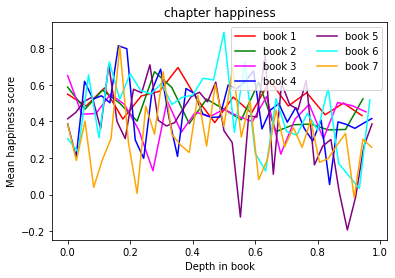

In [14]:
# hver bog hver for sig.
# prøv week 2 rolling average
fig, ax = plt.subplots()
for i in range(1,8):
    dfbook = df[df['book']==i]
    x = np.arange(0,1,1/len(dfbook))
    ax.plot(x, dfbook['happiness'], color=colors[i-1], label=f"book {i}")
ax.legend(loc="upper right", ncol=2)
ax.set_xlabel("Depth in book")
ax.set_ylabel("Mean happiness score")
ax.set_title("chapter happiness")
plt.show()

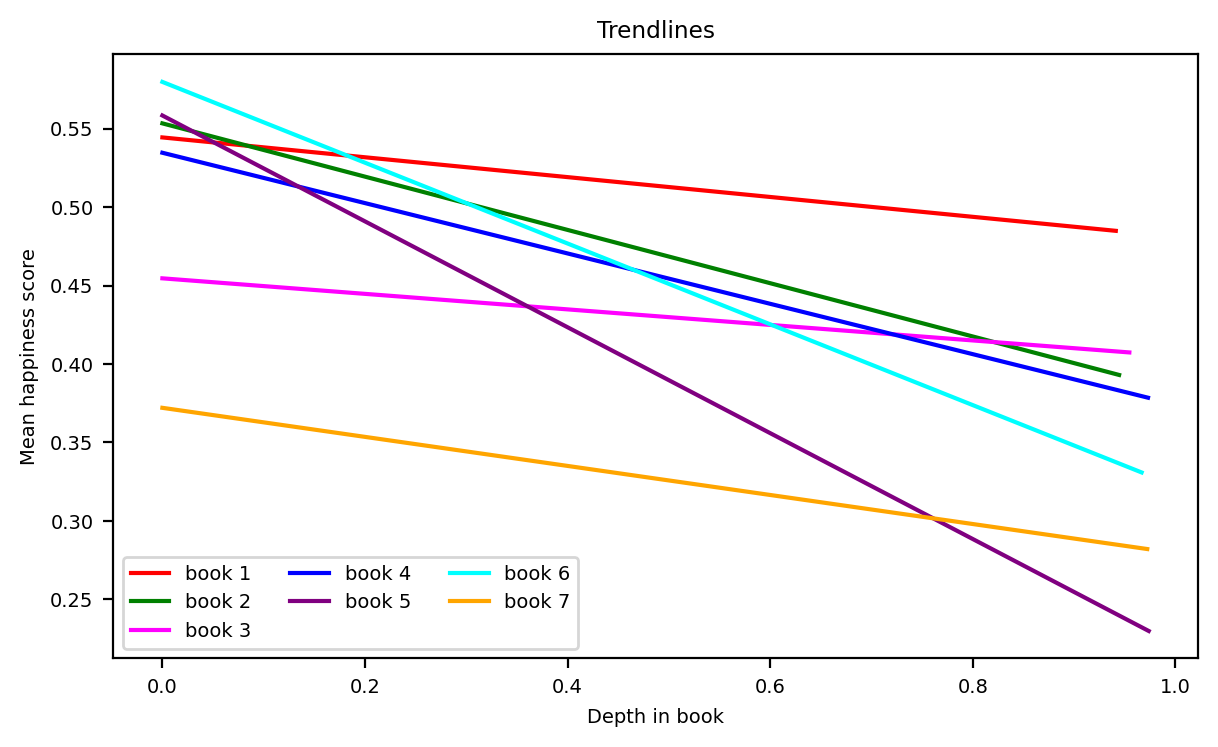

In [45]:
fig, ax = plt.subplots()
for i in range(1,8):
    dfbook = df[df['book']==i]
    x = np.arange(0,1,1/len(dfbook))
    # make trendline
    z = np.polyfit(x, dfbook['happiness'], 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), color=colors[i-1], label=f"book {i}")
ax.legend(loc="lower left", ncol=3)
ax.set_xlabel("Depth in book")
ax.set_ylabel("Mean happiness score")
ax.set_title("Trendlines")
plt.savefig('C:/Users/frede/OneDrive/Dokumenter/DTU/CSS_project_website/static/images/book_happiness_trendlines.png')
plt.show()

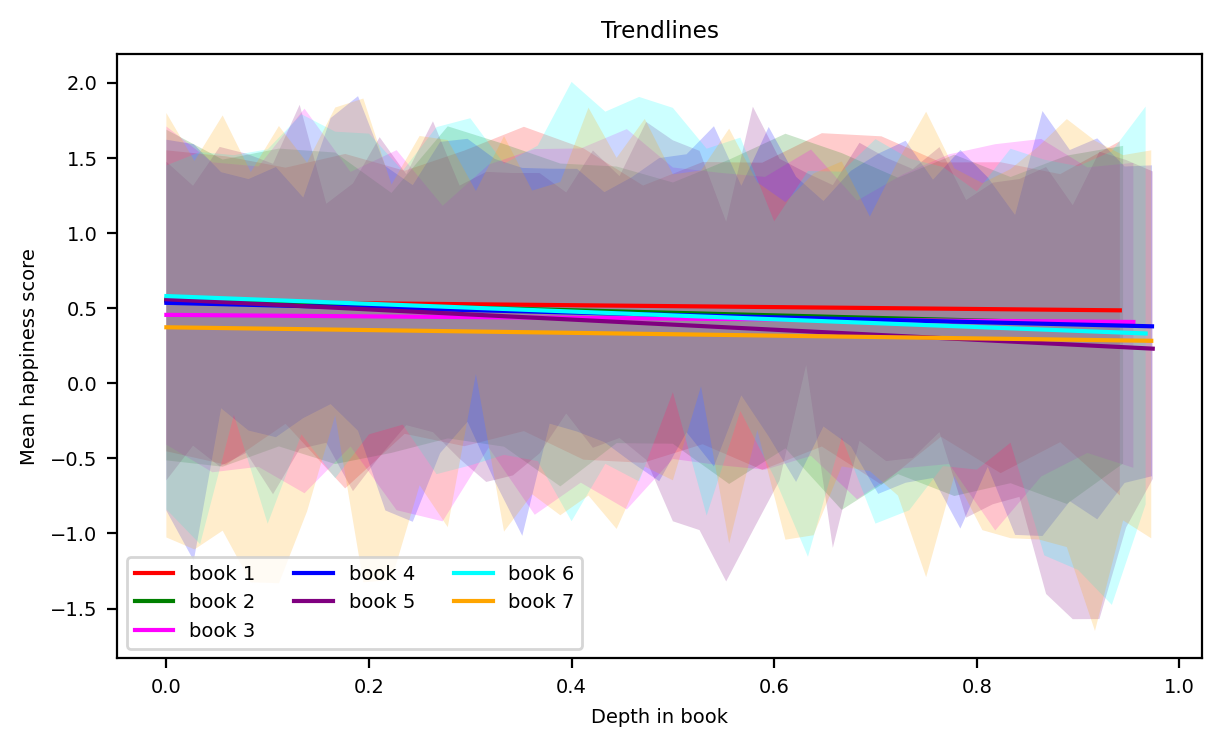

In [44]:
fig, ax = plt.subplots()
for i in range(1,8):
    dfbook = df[df['book']==i]
    x = np.arange(0,1,1/len(dfbook))
    # make trendline
    z = np.polyfit(x, dfbook['happiness'], 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), color=colors[i-1], label=f"book {i}")
    ax.fill_between(x, dfbook['happiness']+dfbook['happiness_std'], dfbook['happiness']-dfbook['happiness_std'], facecolor=colors[i-1], alpha=0.2)
ax.legend(loc="lower left", ncol=3)
ax.set_xlabel("Depth in book")
ax.set_ylabel("Mean happiness score")
ax.set_title("Trendlines")
plt.savefig('C:/Users/frede/OneDrive/Dokumenter/DTU/CSS_project_website/static/images/book_happiness_trendlines_std.png')
plt.show()

# Word shifts


>    1. Pick a chapter. We call it $d$. 
>    2. Build two lists $l$ and $l_{ref}$ containing all tokens for chapter $d$'s plot summary, and in the 3 chapters preceding chapter $d$, respectively. 
>    3. For each token $i$, compute the relative frequency in the two lists $l$ and $l_{ref}$. We call them $p(i,l)$ and $p(i,l_{ref})$, respectively. The relative frequency is computed as the number of times a token occurs over the total length of the document. Store the result in a dictionary.
>    4. For each token $i$, compute the difference in relative frequency $\delta p(i) = p(i,l) - p(i,l_{ref})$. Store the values in a dictionary. Print the top 10 tokens (those with largest relative frequency). Do you notice anything interesting?
>    5. Now, for each token, compute the happiness $h(i) = labMT(i) - 5$, using the labMT dictionary. Here, we subtract $5$, so that positive tokens will have a positive value and negative tokens will have a negative value. Then, compute the product $\delta \Phi = h(i)\cdot \delta p(i)$. Store the results in a dictionary. 
>    6. Print the top 10 tokens, ordered by the absolute value of $|\delta \Phi|$. Explain in your own words the meaning of $\delta \Phi$. If that is unclear, have a look at [this page](https://shifterator.readthedocs.io/en/latest/cookbook/weighted_avg_shifts.html).
>    7. Now install the [``shifterator``](https://shifterator.readthedocs.io/en/latest/installation.html) Python package. We will use it for plotting Word Shifts. 
>    8. Use the function ``shifterator.WeightedAvgShift`` to plot the WordShift, showing which words contributed the most to make your day of choice _d_ happier or more sad then days in the preceding 7 days. Comment on the figure. 
>    9. How do words that you printed in step 6 relate to those shown by the WordShift? 

In [16]:
d = 128 # boggart class
l = df['tokens_cleaned'][d]
l_ref = []
for i in range(3):
    l_ref.extend(df['tokens_cleaned'][d-3:d].values[i])

In [17]:
from collections import Counter
p = dict([(item[0], item[1]/len(l)) for item in Counter(l).items()])
p_ref = dict([(item[0], item[1]/len(l)) for item in Counter(l_ref).items()])

In [18]:
#sorted(p_ref.items(), key = lambda x:x[1],reverse=True)[:10]

In [19]:
#sorted(p.items(), key = lambda x:x[1],reverse=True)[:10]

In [20]:
all_tokens = set(p.keys()).union(set(p_ref.keys()))
# compute difference between pref and p
delta_p = dict([(token, p.get(token,0) - p_ref.get(token,0)) for token in all_tokens])
sorted(delta_p.items(), key = lambda x:x[1], reverse=True)[:10]

[('suddenly', 0.022222222222222223),
 ('archway', 0.022222222222222223),
 ('group', 0.022222222222222223),
 ('duelling', 0.022222222222222223),
 ('rescue', 0.022222222222222223),
 ('telling', 0.022222222222222223),
 ('backwards', 0.022222222222222223),
 ('wants', 0.022222222222222223),
 ('restrains', 0.022222222222222223),
 ('follow', 0.022222222222222223)]

In [21]:
h = dict([(token, happiness_score_dict.get(token, np.nan)) for token in all_tokens])
d_phi = [(token, h[token]*delta_p[token]) for token in all_tokens if not np.isnan(h[token])]
sorted(d_phi, key = lambda x:np.abs(x[1]), reverse=True)[:10]

[('forest', -0.14933333333333332),
 ('death', 0.0768888888888889),
 ('forbidden', 0.07288888888888889),
 ('trap', 0.06933333333333334),
 ('dead', -0.06666666666666667),
 ('angry', 0.05955555555555556),
 ('attack', 0.05733333333333334),
 ('harry', -0.05333333333333338),
 ('curse', 0.052444444444444446),
 ('fight', 0.05111111111111111)]

In [23]:
import shifterator as sh
sentiment_sh = sh.WeightedAvgShift(type2freq_1=p_ref,
                   type2freq_2=p,
                   type2score_1=happiness_score_dict,
                   reference_value=0)
sentiment_sh.get_shift_graph(detailed=True,
                            system_names = ['reference','d'])

c:\users\frede\appdata\local\programs\python\python38\lib\site-packages\shifterator\plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


<AxesSubplot:title={'center':'reference: $\\Phi_{avg}=$0.23\nd: $\\Phi_{avg}=$-0.19'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>